In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
data = pd.read_csv('APPL.csv',parse_dates=True, index_col=0)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-07,1.133101,1.148109,1.110589,1.133101,30828000.0
1990-01-14,1.028045,1.043053,1.013037,1.035549,42974400.0
1990-01-21,1.013037,1.035549,1.005533,1.028045,66284400.0
1990-01-28,1.020541,1.020541,0.968013,0.983021,45312400.0
1990-02-04,0.998029,1.043053,0.998029,1.028045,29618400.0


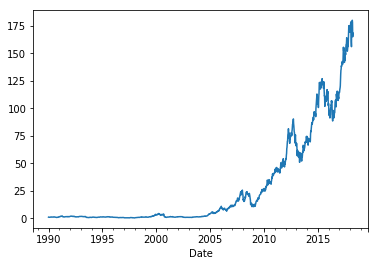

In [3]:
data['Close'].plot()

## Predicting close for 4 week in future
### New Features
1. LDHIGH - Last week(4th) High
2. LDLOW - Last week(4th) Low
3. LDClose - Last week(4th) Close
4. LDOpen - Last week(4th) open

In [4]:
data['LDHigh'] = data.High.shift(4)
data['LDLow'] = data.Low.shift(4)
data['LDClose'] = data.Close.shift(4)
data['LDOpen'] = data.Open.shift(4)
data.head()

,Open,High,Low,Close,Volume,LDHigh,LDLow,LDClose,LDOpen
Date,,,,,,,,,
1990-01-07,1.133101,1.148109,1.110589,1.133101,30828000.0,NaN,NaN,NaN,NaN
1990-01-14,1.028045,1.043053,1.013037,1.035549,42974400.0,NaN,NaN,NaN,NaN
1990-01-21,1.013037,1.035549,1.005533,1.028045,66284400.0,NaN,NaN,NaN,NaN
1990-01-28,1.020541,1.020541,0.968013,0.983021,45312400.0,NaN,NaN,NaN,NaN
1990-02-04,0.998029,1.043053,0.998029,1.028045,29618400.0,1.148109,1.110589,1.133101,1.133101


In [5]:
from sklearn.model_selection import train_test_split
data.dropna(inplace=True)
X = data[['LDHigh','LDLow','LDClose','LDOpen']]
Y = data.Close
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.3,shuffle=False)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
original = go.Scatter(
    x = X_val.index,
    y = Y_val
)

predicted = go.Scatter(
    x = X_val.index,
    y = lr.predict(X_val)
)

data = [original,predicted]
py.iplot(data, filename='our predictions')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~adityajn105/0 or inside your plot.ly account where it is named 'our predictions'


In [8]:
from sklearn.metrics import mean_absolute_error,r2_score
print("Mean Absolute Error :{}".format(mean_absolute_error(lr.predict(X_val),Y_val)))
print("R Square : {}".format(r2_score(Y_val,lr.predict(X_val))))

Mean Absolute Error :4.523417350443624
R Square : 0.9758884002745997
